# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

# My Question

### Write your question here.

# Which Eight countries have the most Netflix movies and TV shows?

In [10]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('Netflix_Movies_and_TV_Shows.csv')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| Title   | Type    | Genre    | Release Year   | Rating   | Duration   | Country       |
|:--------|:--------|:---------|:---------------|:---------|:-----------|:--------------|
| Title 1 | TV Show | Comedy   | 1955           | PG       | 3 Seasons  | Japan         |
| Title 2 | TV Show | Horror   | 2020           | G        | 3 Seasons  | India         |
| Title 3 | TV Show | Action   | 1966           | TV-PG    | 140 min    | United States |
| Title 4 | Movie   | Thriller | 2011           | PG-13    | 3 Seasons  | Canada        |
| Title 5 | TV Show | Romance  | 1959           | TV-14    | 172 min    | India         |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         3000 non-null   object
 1   Type          3000 non-null   object
 2   Genre         3000 non-null   object
 3   Release Year  3000 non-null   int64 
 4   Rating 

In [11]:
 import pandas as pd

# Read the CSV file
df = pd.read_csv('Netflix_Movies_and_TV_Shows.csv')

# Count the occurrences of each country
country_counts = df['Country'].value_counts()

# Find the country with the highest count
most_common_country = country_counts.idxmax()

print("The country with the most Netflix movies and TV shows is:", most_common_country)

The country with the most Netflix movies and TV shows is: Canada


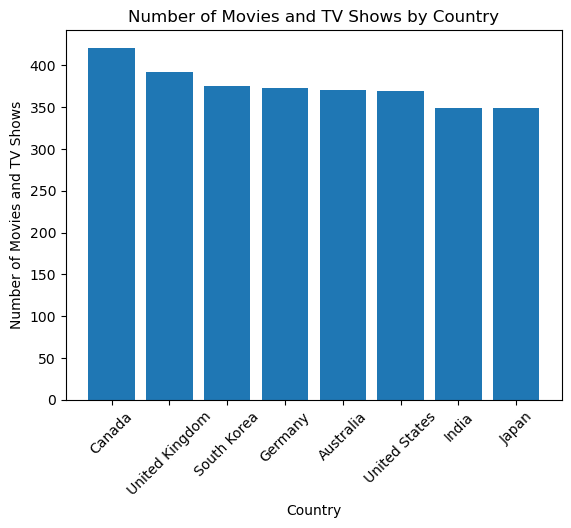

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Netflix_Movies_and_TV_Shows.csv')

# Group the data by country and count the number of rows in each group
country_counts = df.groupby('Country').size()

# Sort the countries by the number of movies and TV shows
sorted_countries = country_counts.sort_values(ascending=False)

# Create a bar chart of the number of movies and TV shows by country
plt.bar(sorted_countries.index, sorted_countries.values)

# Add labels and title to the plot
plt.xlabel('Country')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Number of Movies and TV Shows by Country')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

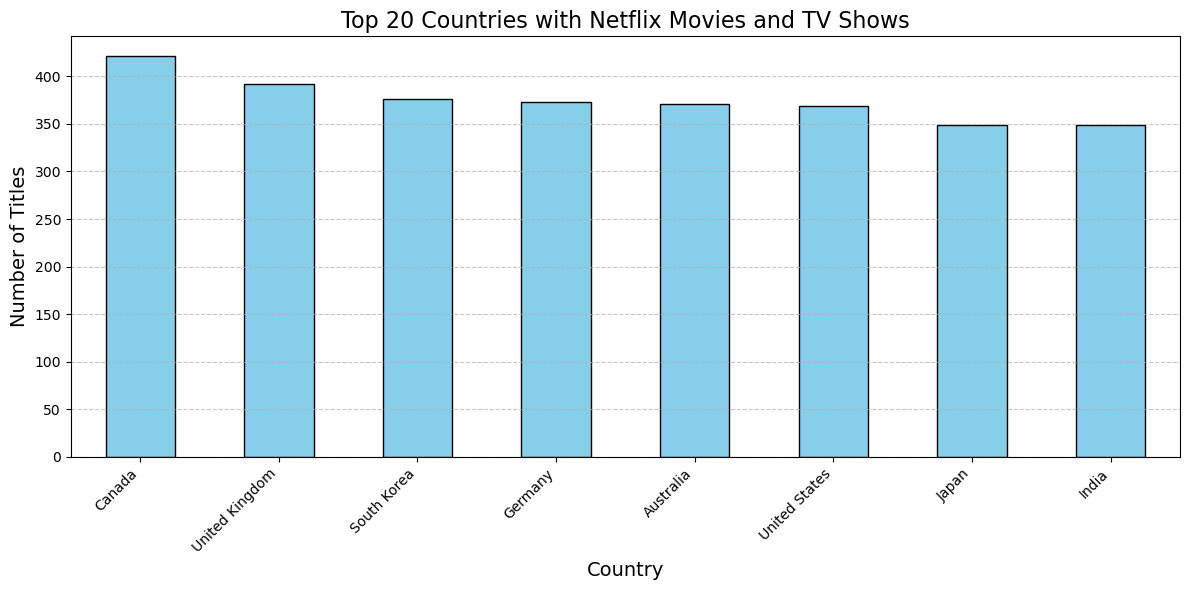

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'Netflix_Movies_and_TV_Shows.csv'  # Replace with your file path
netflix_data = pd.read_csv(file_path)

# Count the number of entries per country
country_counts = netflix_data['Country'].value_counts()

# Create a histogram for countries with Netflix content
plt.figure(figsize=(12, 6))
country_counts.head(20).plot(kind='bar', color='skyblue', edgecolor='black')  # Display the top 20 countries
plt.title('Top 20 Countries with Netflix Movies and TV Shows', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# My Analysis

# My Answer

The country with the most Netflix movies and TV shows is: Canada

The length of each bar represents the number of titles, so you can easily compare the countries by looking at the length of the bars. Canada has the most Netflix movies and TV shows, with over 420 titles.
The United States has the second most titles, with over 370.
Japan has the fewest titles, with just over 350.
There is a wide range of titles available, from over 420 in Canada to just over 350 in Japan. 

The histogram provides a clear picture of the distribution, allowing us to identify that only a handful of countries dominate the Netflix catalog. This reflects Netflix's strategic focus on regions with high demand or strong production capabilities.